<span style="font-size: 14pt">MIPT, Advanced ML, Spring 2018</span>

<span style="font-size: 16pt"> HW #7: CNN models

<span style="color:blue; font-size: 12pt">Sergey Kolesnikov</span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'"> scitator@gmail.com</span>


<h1 align="center">Organization Info</h1> 

* Дедлайн **24 апреля 2018 02:59** для всех групп.
* В качестве решения задания нужно прислать ноутбук с подробными комментариями (<span style='color:red'> без присланного решения результат контеста не будет засчитан </span>).
* <span style='color:red'>Название команды в контесте должно соответствовать шаблону: НомерГруппы_Имя_Фамилия, например, 594_Ivan_Ivanov</span>.

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2018_fall_<номер_группы>_<фамилия>``, к примеру -- ``ML2018_fall_495_ivanov``
- Выполненное дз сохраните в файл ``<фамилия>_<группа>_task<номер>.ipnb, к примеру`` -- ``ivanov_401_task5.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2018_fall Question <Содержание вопроса>``


--------
- **PS1:** Используются автоматические фильтры, и просто не найдем ваше дз, если вы неаккуратно его подпишите.
- **PS2:**  Просроченный дедлайн снижает максимальный вес задания по формуле, указнной на первом семинаре
- **PS3:** Допустимы исправление кода предложенного кода ниже, если вы считаете

---

<h1 align="center">Check Questions </h1> 

Ниже приводится список вопросов, с ответами на которые может быть полезно разобраться для понимания темы.

**Вопрос 1**: Чем отличаются современные сверточные сети от сетей 5 летней давности?

Современные сверточные сети содержат около 200 слоев, а 5 лет назад их количество не превышало 20.

**Вопрос 2**: Какие неприятности могут возникнуть во время обучения современных нейросетей?

Для получения хороших результатов, современные сети обучают на огромных датасетах, например ImageNet (распознование изображений). Из-за огромного размера, данные не помещаются в оперативную память (или графическую память), поэтому нужно иметь оборудование удовлетворяющее этим требваниям.


**Вопрос 3**: У вас есть очень маленький датасет из 100 картинок, классификация, но вы очень хотите использовать нейросеть, какие неприятности вас ждут и как их решить? что делать если первый вариант  решения не заработает?

Обычно в нейросети очень много параметров, которые нужно найти. И 100 картинок не смогут настроить эти параметры. Для решения проблемы нехватки данных можно применить аугментацию. Суть этого метода заключается в увеличении данных за счет изменения исходных данных, например поворот, инверсия, отражение картинки. А если этот способ не помог, то можно попробовать самому разметить данные или
 найти уже размеченную базу данных.
 
**Вопрос 4**: Можно ли сделать стайл трансфер для музыки и как?

Можно, с помощью сверточных нейронных сетей.

---

<h1 align="center">Theory Questions</h1> 

---

### Useful notebooks
#### Colab link (seminar): https://colab.research.google.com/drive/18xjvLspViCwTUXTBNiz_xKxlUblQuGPU
#### Colab link (hw): https://colab.research.google.com/drive/1FlYpA-JHCZ1UilPScC2zWhZNCkE3Sv78

---

# CIFAR Quest

(please read it at least diagonally)

* The ultimate quest is to create a network that has as high __accuracy__ as you can push it.
* There is a __mini-report__ at the end that you will have to fill in. We recommend reading it first and filling it while you iterate.
 
## Grading
* starting at zero points
* +2 for describing your iteration path in a report below.
* +2 for correct check questions
* +1 for beating each of these milestones on __TEST__ dataset:
    * 60% (5 total)
    * 65% (6 total)
    * 70% (7 total)
    * 75% (8 total)
    * 80% (9 total)
    * 82% (10 total)
* +2 for really cool solution:
    * 84% (12 total)
    * 86% (14 total)
    * 88% (16 total)
    * 90% (18 total)
    * 92% (20 total)
    
## Bonus points

Common ways to get bonus points are:
* Get higher score, obviously.
* Anything special about your NN. For example "A super-small/fast NN that gets 80%" gets a bonus.
* Any detailed analysis of the results. (saliency maps, whatever)

## Restrictions
* Please do __NOT__ use pre-trained networks for this assignment.
 * In other words, milestones must be beaten without pre-trained nets (and such net must be present in the e-mail).
* you __can__ use validation data for training, but you __can't'__ do anything with test data apart from running the evaluation procedure.

---

In [1]:
# Load data. It may work slow.
!mkdir cifar10
!curl -o cifar-10-python.tar.gz https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
!tar -xvzf cifar-10-python.tar.gz -C cifar10

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  162M  100  162M    0     0  20.3M      0  0:00:08  0:00:08 --:--:-- 17.9M
cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [0]:
#@title Default title text
import _pickle as pickle
import os
import time
import numpy as np
import tensorflow as tf
from IPython import display
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [0]:
tf.logging.set_verbosity(tf.logging.ERROR)

In [4]:
tf.__version__

'1.7.0'

In [5]:
tf.test.is_gpu_available()

True

In [0]:
import math

def load_CIFAR_batch(filename):
    """ load single batch of cifar """
    with open(filename, 'rb') as f:
        datadict = pickle.load(f, encoding='iso-8859-1')
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32).astype("float")
        Y = np.array(Y)
        return X, Y

def load_CIFAR10(ROOT):
    """ load all of cifar """
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)    
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte

In [0]:
def augment(images, labels,
            resize=None, # (width, height) tuple or None
            horizontal_flip=False,
            vertical_flip=False,
            rotate=0, # Maximum rotation angle in degrees
            crop_probability=0, # How often we do crops
            crop_min_percent=0.6, # Minimum linear dimension of a crop
            crop_max_percent=1.,  # Maximum linear dimension of a crop
            mixup=0):  # Mixup coeffecient, see https://arxiv.org/abs/1710.09412.pdf
  if resize is not None:
    images = tf.image.resize_bilinear(images, resize)
  
  # My experiments showed that casting on GPU improves training performance
  if images.dtype != tf.float32:
    images = tf.image.convert_image_dtype(images, dtype=tf.float32)
    images = tf.subtract(images, 0.5)
    images = tf.multiply(images, 2.0)
  labels = tf.to_float(labels)

  with tf.name_scope('augmentation'):
    shp = tf.shape(images)
    batch_size, height, width = shp[0], shp[1], shp[2]
    width = tf.cast(width, tf.float32)
    height = tf.cast(height, tf.float32)

    # The list of affine transformations that our image will go under.
    # Every element is Nx8 tensor, where N is a batch size.
    transforms = []
    identity = tf.constant([1, 0, 0, 0, 1, 0, 0, 0], dtype=tf.float32)
    if horizontal_flip:
      coin = tf.less(tf.random_uniform([batch_size], 0, 1.0), 0.5)
      flip_transform = tf.convert_to_tensor(
          [-1., 0., width, 0., 1., 0., 0., 0.], dtype=tf.float32)
      transforms.append(
          tf.where(coin,
                   tf.tile(tf.expand_dims(flip_transform, 0), [batch_size, 1]),
                   tf.tile(tf.expand_dims(identity, 0), [batch_size, 1])))

    if vertical_flip:
      coin = tf.less(tf.random_uniform([batch_size], 0, 1.0), 0.5)
      flip_transform = tf.convert_to_tensor(
          [1, 0, 0, 0, -1, height, 0, 0], dtype=tf.float32)
      transforms.append(
          tf.where(coin,
                   tf.tile(tf.expand_dims(flip_transform, 0), [batch_size, 1]),
                   tf.tile(tf.expand_dims(identity, 0), [batch_size, 1])))

    if rotate > 0:
      angle_rad = rotate / 180 * math.pi
      angles = tf.random_uniform([batch_size], -angle_rad, angle_rad)
      transforms.append(
          tf.contrib.image.angles_to_projective_transforms(
              angles, height, width))

    if crop_probability > 0:
      crop_pct = tf.random_uniform([batch_size], crop_min_percent,
                                   crop_max_percent)
      left = tf.random_uniform([batch_size], 0, width * (1 - crop_pct))
      top = tf.random_uniform([batch_size], 0, height * (1 - crop_pct))
      crop_transform = tf.stack([
          crop_pct,
          tf.zeros([batch_size]), top,
          tf.zeros([batch_size]), crop_pct, left,
          tf.zeros([batch_size]),
          tf.zeros([batch_size])
      ], 1)

      coin = tf.less(
          tf.random_uniform([batch_size], 0, 1.0), crop_probability)
      transforms.append(
          tf.where(coin, crop_transform,
                   tf.tile(tf.expand_dims(identity, 0), [batch_size, 1])))

    if transforms:
      images = tf.contrib.image.transform(
          images,
          tf.contrib.image.compose_transforms(*transforms),
          interpolation='BILINEAR') # or 'NEAREST'

    def cshift(values): # Circular shift in batch dimension
      return tf.concat([values[-1:, ...], values[:-1, ...]], 0)

    if mixup > 0:
      beta = tf.distributions.Beta(mixup, mixup)
      lam = beta.sample(batch_size)
      ll = tf.expand_dims(tf.expand_dims(tf.expand_dims(lam, -1), -1), -1)
      images = ll * images + (1 - ll) * cshift(images)
      labels = lam * labels + (1 - lam) * cshift(labels)
  labels = tf.cast(labels, tf.int32)
  return images, labels

In [0]:
def color_preprocessing(x_train,x_test):
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    mean = [125.307, 122.95, 113.865]
    std  = [62.9932, 62.0887, 66.7048]
    for i in range(3):
        x_train[:,i,:,:] = (x_train[:,i,:,:] - mean[i]) / std[i]
        x_test[:,i,:,:] = (x_test[:,i,:,:] - mean[i]) / std[i]

    return x_train, x_test

def scheduler(epoch):
    learning_rate = 1e-3
    if epoch > 80:
        learning_rate *= 0.5e-3
    elif epoch > 60:
        learning_rate *= 1e-3
    elif epoch > 40:
        learning_rate *= 1e-2
    elif epoch > 20:
        learning_rate *= 1e-1
    return learning_rate

In [0]:
plt.rcParams['figure.figsize'] = (10.0, 8.0) 

cifar10_dir = './cifar10/cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

X_train, X_test = color_preprocessing(X_train, X_test)

In [10]:
print(X_train.shape, y_train.shape, X_test.shape)

(50000, 3, 32, 32) (50000,) (10000, 3, 32, 32)


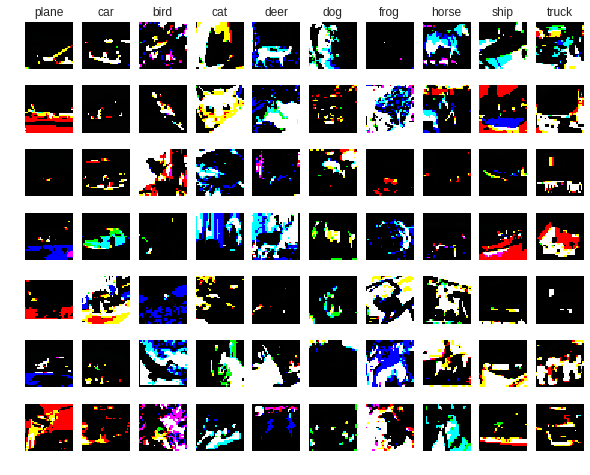

In [11]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8').transpose(1, 2, 0))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [0]:
# config
batch_size    = 128
epochs        = 200
iterations    = 391
num_classes   = 10
dropout       = 0.5
weight_decay  = 0.0001

In [0]:
# Write your convolutional NN with Tensorflow (example in seminar).
# Create new graph
graph = tf.Graph()
# whether to retrain model from scratch or use saved model
init = True
model_name = "model_7.13.4.7.7l_8"

with graph.as_default():
    # Placeholders
    X = tf.placeholder(dtype=tf.float32, shape=[None, 32, 32, 3])
    y = tf.placeholder(dtype=tf.int32, shape=[None])
    training = tf.placeholder(dtype=tf.bool)
    
    X, y = tf.cond(tf.equal(training, tf.constant(True)), 
                   lambda: augment(X, y,
                         horizontal_flip=True, rotate=15, crop_probability=0.8, mixup=4.0),
                   lambda: (X, y))
    
    # create global step for decaying learning rate
    global_step = tf.Variable(0, trainable=False)

    # lambda 6
    lamC = 0.0001
    lamF = 0.0025000
        
    
    learning_rate = tf.placeholder(tf.float32, shape=[], name='learning_rate') 

    # Small epsilon value for the BN transform
    epsilon = 1e-3
    
    with tf.name_scope('conv1') as scope:
        # Convolutional layer 1 
        conv1 = tf.layers.conv2d(
            X,                           # Input data
            filters=192,                  # 192 filters
            kernel_size=(5, 5),          # Kernel size: 5x5
            strides=(1, 1),              # Stride: 1
            padding='SAME',              # "same" padding
            activation=None,             # None
            kernel_initializer=tf.truncated_normal_initializer(stddev=5e-2, seed=10),
            kernel_regularizer=tf.contrib.layers.l2_regularizer(scale=lamC),
            name='conv1'                 
        )
        
        bn1 = tf.layers.batch_normalization(
            conv1,
            axis=-1,
            momentum=0.99,
            epsilon=epsilon,
            center=True,
            scale=True,
            beta_initializer=tf.zeros_initializer(),
            gamma_initializer=tf.ones_initializer(),
            moving_mean_initializer=tf.zeros_initializer(),
            moving_variance_initializer=tf.ones_initializer(),
            training=training,
            name='bn1'
        )
        #apply relu
        conv1_bn_relu = tf.nn.relu(bn1, name='relu1')

        conv1_bn_relu = tf.layers.dropout(conv1_bn_relu, rate=0.1, seed=9, training=training)
    
    with tf.name_scope('conv1_1') as scope:
        # Convolutional layer 1_1
        conv1_1 = tf.layers.conv2d(
            conv1_bn_relu,                           # Input data
            filters=160,                  # 160 filters
            kernel_size=(1, 1),          # Kernel size: 1x1
            strides=(1, 1),              # Stride: 1
            padding='SAME',              # "same" padding
            activation=None,             # None
            kernel_initializer=tf.truncated_normal_initializer(stddev=5e-2, seed=8),
            kernel_regularizer=tf.contrib.layers.l2_regularizer(scale=lamC),
            name='conv1_1'                  # Add name
        )

        #apply relu
        conv1_1_bn_relu = tf.nn.relu(conv1_1, name='relu1_1')
        
    with tf.name_scope('conv1_2') as scope:
        # Convolutional layer 1_2
        conv1_2 = tf.layers.conv2d(
            conv1_1_bn_relu,                           # Input data
            filters=96,                  # 96 filters
            kernel_size=(1, 1),          # Kernel size: 1x1
            strides=(1, 1),
            padding='SAME',              # "same" padding
            activation=None,             # None
            kernel_initializer=tf.truncated_normal_initializer(stddev=5e-2, seed=15),
            kernel_regularizer=tf.contrib.layers.l2_regularizer(scale=lamC),
            name='conv1_2'                 
        )
        #apply relu
        conv1_2_relu = tf.nn.relu(conv1_2, name='relu1_2')
    
    with tf.name_scope('pool1') as scope:
         # Max pooling layer 1
        pool1 = tf.layers.max_pooling2d(
            conv1_2_relu,                       # Input
            pool_size=(3, 3),            # Pool size: 3x3
            strides=(2, 2),              # Stride: 2
            padding='SAME',              # "same" padding
            name='pool1'
        )

        # dropout at 50%
        pool1 = tf.layers.dropout(pool1, rate=0.5, seed=1, training=training)

    with tf.name_scope('conv2') as scope:
        # Convolutional layer 2
        conv2= tf.layers.conv2d(
            pool1,                       # Input
            filters=192,                  # 192 filters
            kernel_size=(5, 5),          # Kernel size: 5x5
            strides=(1, 1),              # Stride: 1
            padding='SAME',              # "same" padding
            activation=None,             # None
            kernel_initializer=tf.truncated_normal_initializer(stddev=5e-2, seed=7),
            kernel_regularizer=tf.contrib.layers.l2_regularizer(scale=lamC),
            name='conv2'                 
        )
        
        bn2 = tf.layers.batch_normalization(
            conv2,
            axis=-1,
            momentum=0.99,
            epsilon=epsilon,
            center=True,
            scale=True,
            beta_initializer=tf.zeros_initializer(),
            gamma_initializer=tf.ones_initializer(),
            moving_mean_initializer=tf.zeros_initializer(),
            moving_variance_initializer=tf.ones_initializer(),
            training=training,
            name='bn2'
        )

        #apply relu
        conv2_bn_relu = tf.nn.relu(bn2, name='relu2')
        
        # dropout at 10%
        conv2_bn_relu = tf.layers.dropout(conv2_bn_relu, rate=0.1, seed=0, training=training)

    with tf.name_scope('conv2_1') as scope:
        # Convolutional layer 2_1
        conv2_1 = tf.layers.conv2d(
            conv2_bn_relu,                           # Input data
            filters=192,                  # 192 filters
            kernel_size=(1, 1),          # Kernel size: 1x1
            strides=(1, 1),              # Stride: 1
            padding='SAME',              # "same" padding
            activation=None,             # None
            kernel_initializer=tf.truncated_normal_initializer(stddev=5e-2, seed=18),
            kernel_regularizer=tf.contrib.layers.l2_regularizer(scale=lamC),
            name='conv2_1'                  # Add name
        )

        #apply relu
        conv2_1_bn_relu = tf.nn.relu(conv2_1, name='relu2_1')
        
    with tf.name_scope('conv2_2') as scope:
        # Convolutional layer 2_2
        conv2_2= tf.layers.conv2d(
            conv2_1_bn_relu,                           # Input data
            filters=192,                  # 192 filters
            kernel_size=(1, 1),          # Kernel size: 1x1
            strides=(1, 1),
            padding='SAME',              # "same" padding
            activation=None,             # None
            kernel_initializer=tf.truncated_normal_initializer(stddev=5e-2, seed=7),
            kernel_regularizer=tf.contrib.layers.l2_regularizer(scale=lamC),
            name='conv2_2'                 
        )
        #apply relu
        conv2_2_relu = tf.nn.relu(conv2_2, name='relu2_2')
        
    with tf.name_scope('pool2') as scope:
        # Max pooling layer 2 
        pool2 = tf.layers.max_pooling2d(
            conv2_2_relu,                       # input
            pool_size=(3, 3),            # pool size 3x3
            strides=(2, 2),              # stride 2
            padding='SAME',
            name='pool2'
        )
        # dropout at 50%
        pool2 = tf.layers.dropout(pool2, rate=0.5, seed=10, training=training)


    with tf.name_scope('conv3') as scope:
        # Convolutional layer 3
        conv3= tf.layers.conv2d(
            pool2,                       # Input
            filters=192,                 # 192 filters
            kernel_size=(3, 3),          # Kernel size: 3x3
            strides=(1, 1),              # Stride: 1
            padding='SAME',              # "same" padding
            activation=None,       
            kernel_initializer=tf.truncated_normal_initializer(stddev=5e-2, seed=2),
            kernel_regularizer=tf.contrib.layers.l2_regularizer(scale=lamC),
            name='conv3'                 
        )
        
        bn3 = tf.layers.batch_normalization(
            conv3,
            axis=-1,
            momentum=0.99,
            epsilon=epsilon,
            center=True,
            scale=True,
            beta_initializer=tf.zeros_initializer(),
            gamma_initializer=tf.ones_initializer(),
            moving_mean_initializer=tf.zeros_initializer(),
            moving_variance_initializer=tf.ones_initializer(),
            training=training,
            name='bn3'
        )
        
        # activation
        conv3_bn_relu = tf.nn.relu(bn3, name='relu3')

        # try dropout here
        conv3_bn_relu = tf.layers.dropout(conv3_bn_relu, rate=0.1, seed=3, training=training)    

    with tf.name_scope('conv3_1') as scope:
        # Convolutional layer 3_1
        conv3_1 = tf.layers.conv2d(
            conv3_bn_relu,                           # Input data
            filters=192,                  # 192 filters
            kernel_size=(1, 1),          # Kernel size: 1x1
            strides=(1, 1),              # Stride: 1
            padding='SAME',              # "same" padding
            activation=None,             # None
            kernel_initializer=tf.truncated_normal_initializer(stddev=5e-2, seed=9),
            kernel_regularizer=tf.contrib.layers.l2_regularizer(scale=lamC),
            name='conv3_1'                  # Add name
        )

        #apply relu
        conv3_1_bn_relu = tf.nn.relu(conv3_1, name='relu3_1')
        
    with tf.name_scope('conv3_2') as scope:
        # Convolutional layer 3_2 
        conv3_2= tf.layers.conv2d(
            conv3_1_bn_relu,                           # Input data
            filters=10,                  # 10 filters
            kernel_size=(1, 1),          # Kernel size: 1x1
            strides=(1, 1),
            padding='SAME',              # "same" padding
            activation=None,             # None
            kernel_initializer=tf.truncated_normal_initializer(stddev=5e-2, seed=6),
            kernel_regularizer=tf.contrib.layers.l2_regularizer(scale=lamC),
            name='conv3_2'                 
        )
        #apply relu
        conv3_2_relu = tf.nn.relu(conv3_2, name='relu3_2')
        
    with tf.name_scope('pool3') as scope:
        # Max pooling layer 3
        pool3 = tf.layers.average_pooling2d(
            conv3_2_relu,               # input
            pool_size=(8, 8),            # pool size 8x8
            strides=(8, 8),              # stride 8
            padding='SAME',
            name='pool3'
        )
    
    with tf.name_scope('flatten') as scope:
        # Flatten output
        flat_output = tf.contrib.layers.flatten(pool3)

 
    # Output layer
    logits = tf.layers.dense(
        flat_output,                         # input
        num_classes,                           # One output unit per category
        activation=None,             # No activation function
        kernel_initializer=tf.variance_scaling_initializer(scale=1, seed=6),
        bias_initializer=tf.zeros_initializer(),
        name="logits"
    )
    
    # Mean cross-entropy
    mean_ce = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits))
    loss = mean_ce + tf.losses.get_regularization_loss()
    
    # Adam optimizer
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
    
    # Minimize cross-entropy
    train_op = optimizer.minimize(loss, global_step=global_step)

    # Compute predictions and accuracy
    predictions = tf.argmax(logits, axis=1, output_type=tf.int32)
    is_correct = tf.equal(y, predictions)
    accuracy = tf.reduce_mean(tf.cast(is_correct, dtype=tf.float32))
    
    # add this so that the batch norm gets run
    extra_update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    
    # Create summary hooks
    tf.summary.scalar('accuracy', accuracy)
    tf.summary.scalar('cross_entropy', mean_ce)
    tf.summary.scalar('learning_rate', learning_rate)
    
    # Merge all the summaries and write them out to /tmp/mnist_logs (by default)
    merged = tf.summary.merge_all()



In [0]:
def train_fn(X_tr, y_tr, sess, epoch):
    '''
    returns tuple (loss, accuracy) for model train phase
    '''
    # Run training and evaluate accuracy
    X_tr = X_tr.reshape((batch_size, 32, 32, 3))
    _, _, summary, acc_value, loss_value, step = sess.run([train_op, extra_update_ops, merged, accuracy, loss, global_step], feed_dict={
                    X: X_tr,
                    y: y_tr,
                    training: True,
                    learning_rate: scheduler(epoch)
                })
    return (loss_value, acc_value)

def eval_fn(X_ev, y_ev, sess, epoch):
    '''
    returns tuple (loss, accuracy) for model evaluation phase
    '''
    X_ev = X_ev.reshape((batch_size, 32, 32, 3))
    summary, valid_acc, valid_loss = sess.run([merged, accuracy, loss], feed_dict={
                X: X_ev,
                y: y_ev,
                training: False,
                learning_rate: scheduler(epoch)
            })
    return (valid_loss, valid_acc)

def predict_fn(X_pr, sess, epoch):
    '''
    returns y_pred for model predict phase
    '''
    X_pr = X_pr.reshape((batch_size, 32, 32, 3))
    predict = sess.run([predictions], feed_dict={
                X: X_pr,
                training: False,
                learning_rate: scheduler(epoch)
            })
    return predict

In [0]:
def iterate_minibatches(inputs, targets, batchsize, shuffle=False):
    assert len(inputs) == len(targets)
    if shuffle:
        indices = np.arange(len(inputs))
        np.random.shuffle(indices)
    for start_idx in range(0, len(inputs) - batchsize + 1, batchsize):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
        yield inputs[excerpt], targets[excerpt]

In [0]:
# @TODO: add your code for train&validation metrics plots:
#  - epoch loss (train&validation - 2 curves on same figure)
#  - epoch accurary (train&validation - 2 curves on same figure)

In [0]:
init = True

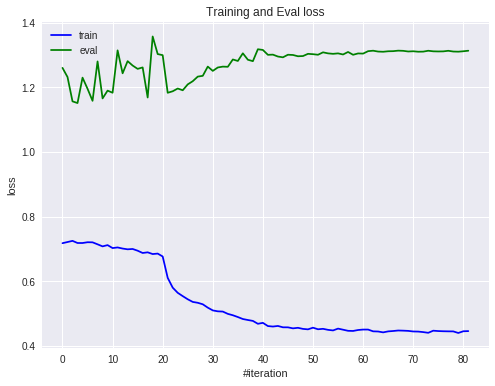

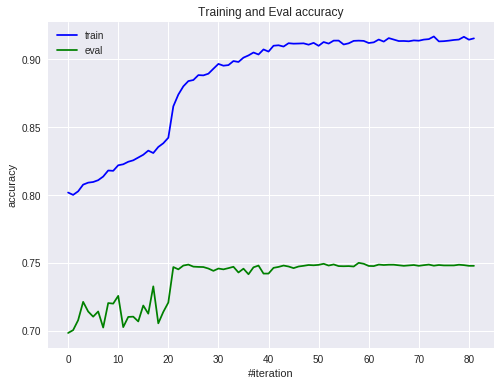

Epoch 82 of 200 took 76.446s
  train loss:		0.445538
  train accuracy:		91.54 %
  valid loss:		1.313058
  valid accuracy:		74.78 %


KeyboardInterrupt: ignored

In [68]:
train_loss_history = []
valid_loss_history = []
train_accuracy_history = []
valid_accuracy_history = []
config = tf.ConfigProto()

with tf.Session(graph=graph, config=config) as sess:
    saver = tf.train.Saver()
    if init:
        sess.run(tf.global_variables_initializer())
    else:
        saver.restore(sess, './model/cifar_'+model_name+'.ckpt')
        
    # Set seed
    np.random.seed(0)
    
    for epoch in range(epochs):
        # In each epoch, we do a full pass over the training data:
        train_loss = 0
        train_acc = 0
        train_batches = 0
        start_time = time.time()
        for batch in iterate_minibatches(X_train, y_train, batch_size):
            inputs, targets = batch
            train_loss_batch, train_acc_batch = train_fn(inputs, targets, sess, epoch)
            train_loss += train_loss_batch
            train_acc += train_acc_batch
            train_batches += 1
        train_loss_history.append(train_loss / train_batches)
        train_accuracy_history.append(train_acc / train_batches)
    
        # And a full pass over the validation data:
        valid_loss = 0
        valid_acc = 0
        valid_batches = 0
        for batch in iterate_minibatches(X_test, y_test, batch_size):
            inputs, targets = batch
            valid_loss_batch, valid_acc_batch = eval_fn(inputs, targets, sess, epoch)
            valid_loss += valid_loss_batch
            valid_acc += valid_acc_batch
            valid_batches += 1
        valid_loss_history.append(valid_loss / valid_batches)
        valid_accuracy_history.append(valid_acc / valid_batches)
            
        # Visualize
        display.clear_output(wait=True)

        plt.figure(figsize=(8, 6))   
        plt.title("Training and Eval loss")
        plt.xlabel("#iteration")
        plt.ylabel("loss")
        plt.plot(train_loss_history, 'b', label='train')
        plt.plot(valid_loss_history, 'g', label='eval')
        plt.legend()
        plt.show()

        plt.figure(figsize=(8, 6))   
        plt.title("Training and Eval accuracy")
        plt.xlabel("#iteration")
        plt.ylabel("accuracy")
        plt.plot(train_accuracy_history, 'b', label='train')
        plt.plot(valid_accuracy_history, 'g', label='eval')
        plt.legend()
        plt.show()
    
        # Then we print the results for this epoch:
        print("Epoch {} of {} took {:.3f}s".format(epoch + 1, epochs, time.time() - start_time))
        print("  train loss:\t\t{:.6f}".format(train_loss / train_batches))
        print("  train accuracy:\t\t{:.2f} %".format(train_acc / train_batches * 100))
        print("  valid loss:\t\t{:.6f}".format(valid_loss / valid_batches))
        print("  valid accuracy:\t\t{:.2f} %".format(valid_acc / valid_batches * 100))
        
        # save the session
        save_path = saver.save(sess, './model/cifar_'+model_name+'.ckpt')
        init = False

Этот график получен уже после того как я обучил сеть до 70% и перезапустил обучение.

In [0]:
# test_acc = 0
test_batches = 0
for batch in iterate_minibatches(X_test, y_test, 500):
    inputs, targets = batch
    _, acc = eval_fn(inputs, targets)
    test_acc += acc
    test_batches += 1
print("Final results:")
print("  test accuracy:\t\t{:.2f} %".format(
    test_acc / test_batches * 100))

if test_acc / test_batches * 100 > 92.5:
    print("Achievement unlocked: mage 80 lvl")
else:
    print("Feed more!")

### Hi, my name is `...Luke Cifarwalker...`, and here's my story

A long ago in a galaxy far far away, when it was still more than an hour before deadline, i got an idea:

##### I gonna build a neural network, that
Нейронная сеть состоит из трех мега-слоев, которые состоят из convolution, batch-normalization, dropout, convolution, convolution, pooling, dropout. На выходе третьего мега-слоя мы получаем тензор размера (?, 8, 8, 10), для каждого канала считаем среднее, применяем softmax и получаем итоговые ответы принадлежности каждому классу. 

Прежде чем засунуть данные в сеть я отнормировал их, еще для лучшей обучаемости я добавил аугментацию. Для борьбы с переобучением я использую dropout и batch-normalization.

